In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load data

In [2]:
df=pd.read_excel('HAR.xlsx')

In [3]:
df.head()

,timeElapsed,x,y,z,label
0,0,0.863571,0.768036,0.623535,walk
1,1,0.640259,0.446991,0.146103,walk
2,2,0.161346,0.968292,0.097305,walk
3,3,0.263855,0.864182,-0.022659,walk
4,4,0.332031,0.900116,-0.016571,walk


## Plot Axies of Accelerometer Dataset 

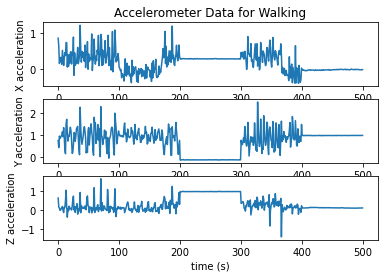

<Figure size 720x720 with 0 Axes>

In [4]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [5]:
X_acc= df['x'].values
Y_acc= df['y'].values
Z_acc= df['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [6]:
def Filter (Data):
        a=0.6  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [7]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

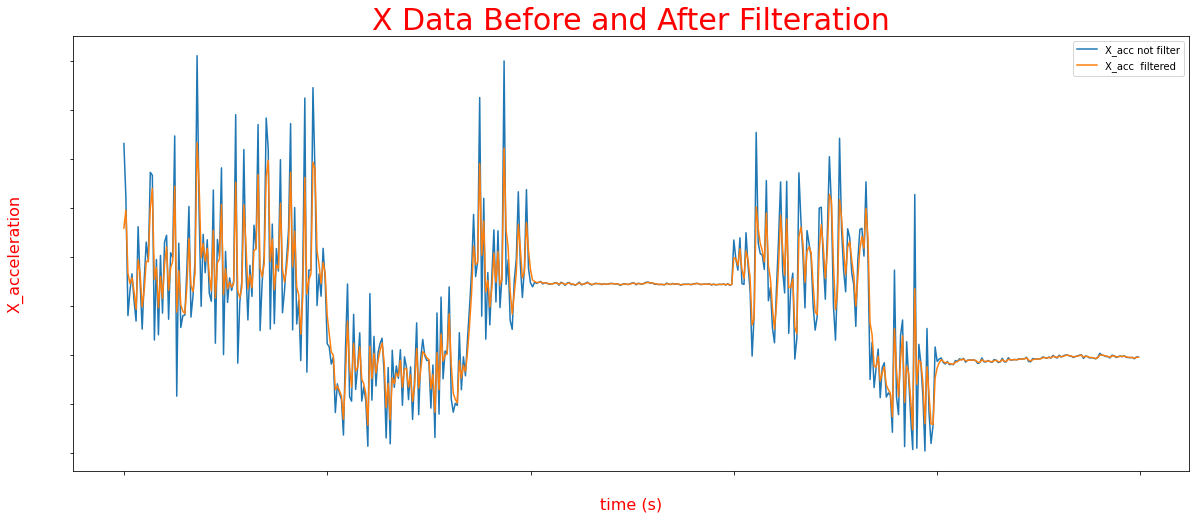

In [8]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


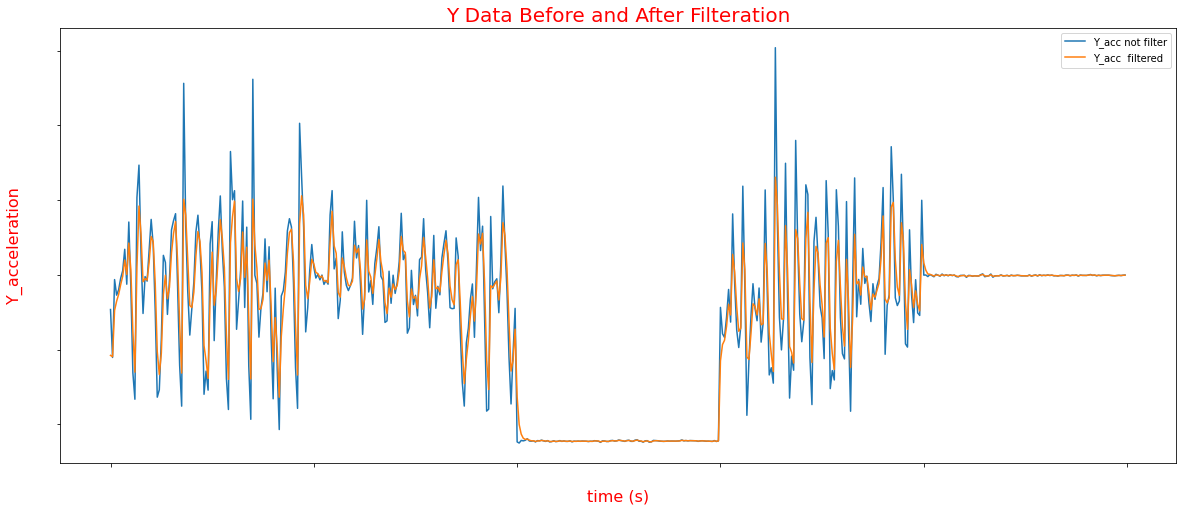

In [9]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

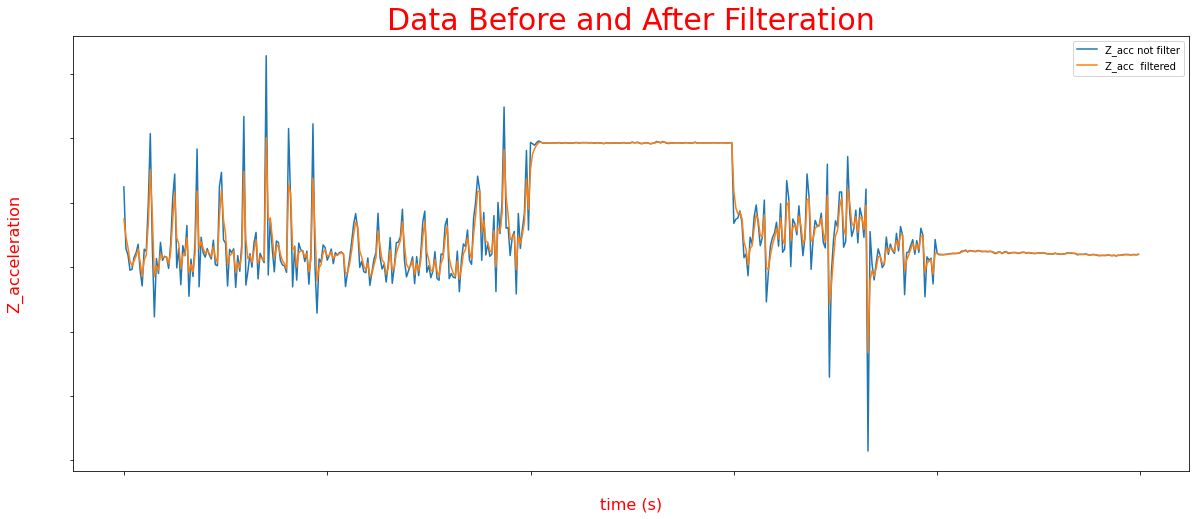

In [10]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [11]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 6)
Y_smoothed = gaussian_filter1d(Y_filtered, 6)
Z_smoothed = gaussian_filter1d(Z_filtered, 6)


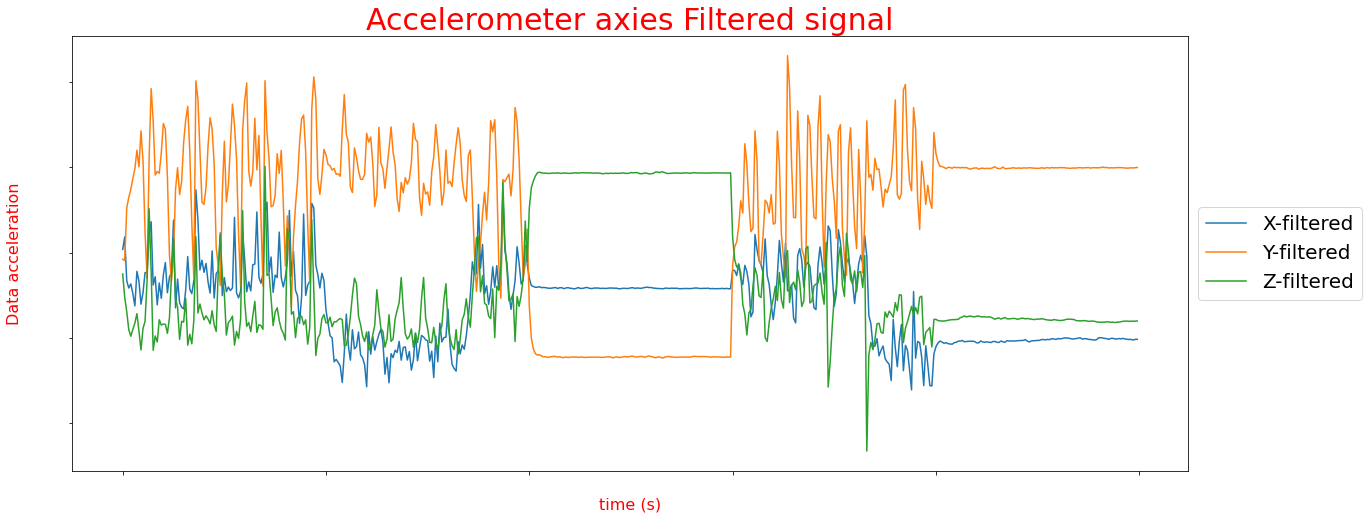

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

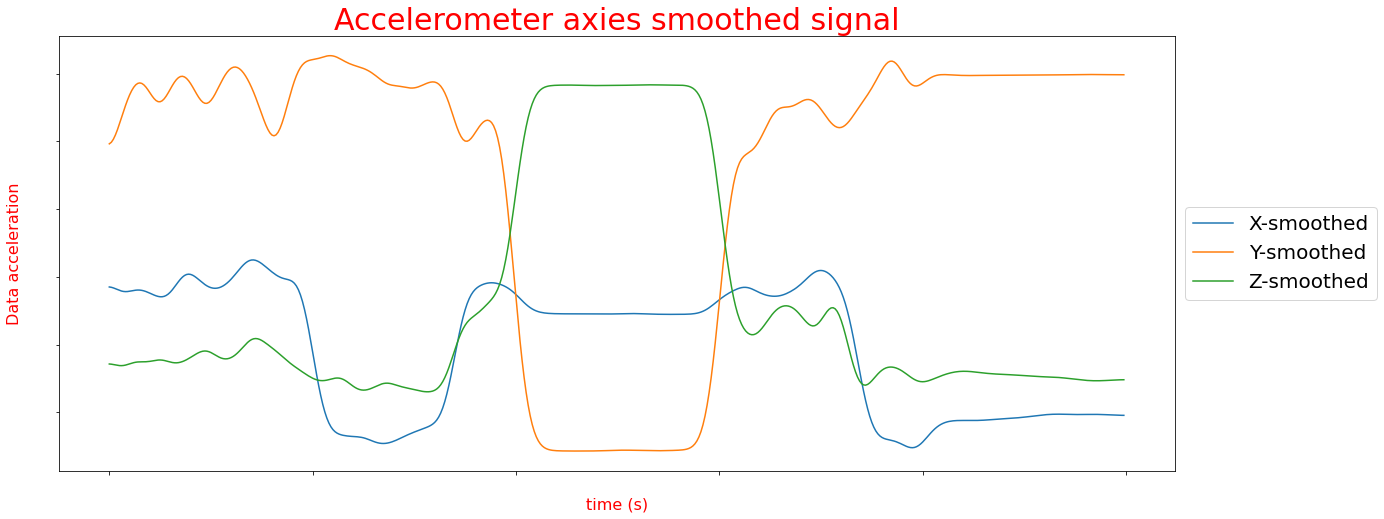

In [13]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## Applying FD,XYZ & Searching for Strides

In [14]:
df_XYZ=df['x']*df['x']+df['y']*df['y']+df['z']*df['z']
XYZ=df_XYZ.apply(np.sqrt)

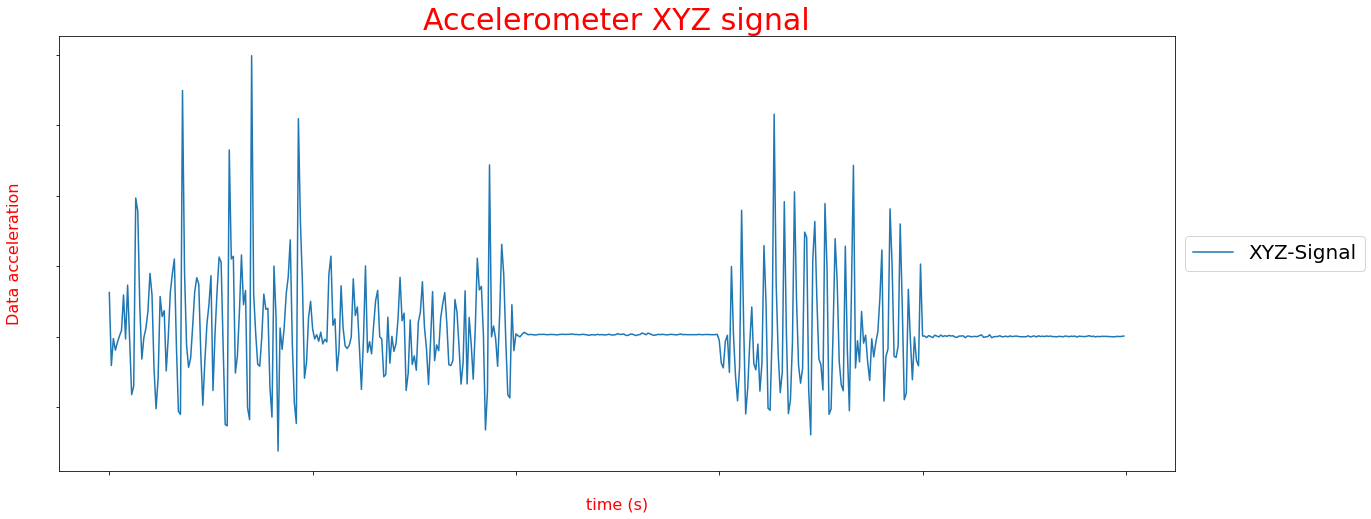

In [15]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ-Signal')

plt.title('Accelerometer XYZ signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [16]:

XYZ_smoothed=X_smoothed**2+Y_smoothed**2+Z_smoothed**2

In [17]:
xyz_smoothed=pd.DataFrame(XYZ_smoothed)

In [18]:
xyz_smoothed=xyz_smoothed.apply(np.sqrt)

KeyError: (slice(None, None, None), None)

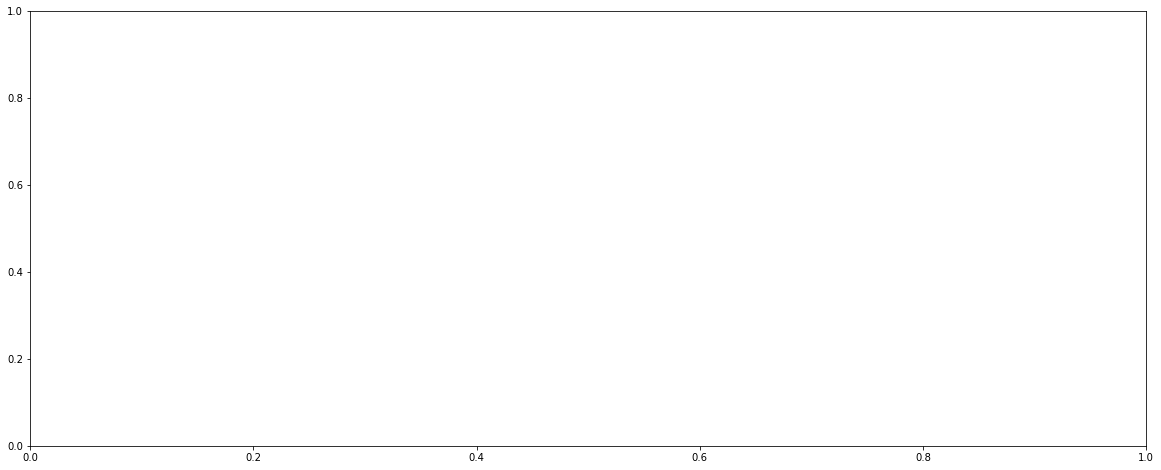

In [19]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ-Smoothed-Signal')

plt.title('Accelerometer XYZ smoothd signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

## SET Peak And Valley for signal data & Perfom Segmentation 

In [20]:
peak=xyz_smoothed.values.flatten()

In [21]:
peak.shape

(500,)

In [22]:
inv_peak=peak*-1 

Get Inverse of peak to find Valley 


In [23]:
from scipy.signal import find_peaks,peak_widths,find_peaks_cwt
peak_x, _ = find_peaks(peak)  ##Detect Peaks
valley, _ = find_peaks(inv_peak) ##detect valley

In [24]:
peak_x

array([ 15,  37,  64,  95, 109, 159, 187, 225, 265, 344, 385, 411, 459,
       480], dtype=int64)

In [25]:
list_of_valley=list(valley)

In [26]:
t=df['timeElapsed']

KeyError: (slice(None, None, None), None)

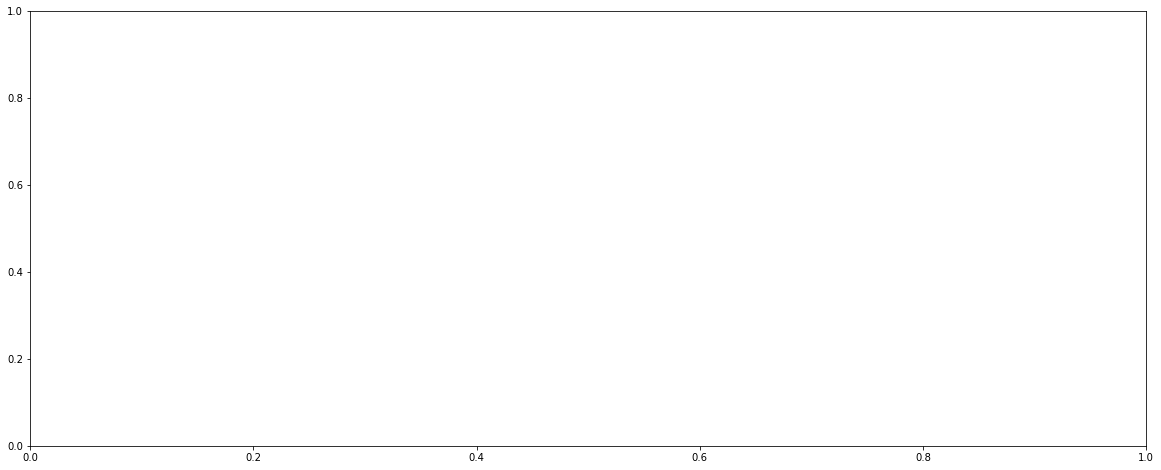

In [27]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ_smoothed_magnitude',color='orange')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Peaks')
plt.plot(t[valley], peak[valley], 'b.',label='valley')
for i in list_of_valley:
    plt.axvline(t[i],color='blue')
plt.title('Accelerometer Peak and Valley Detection',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

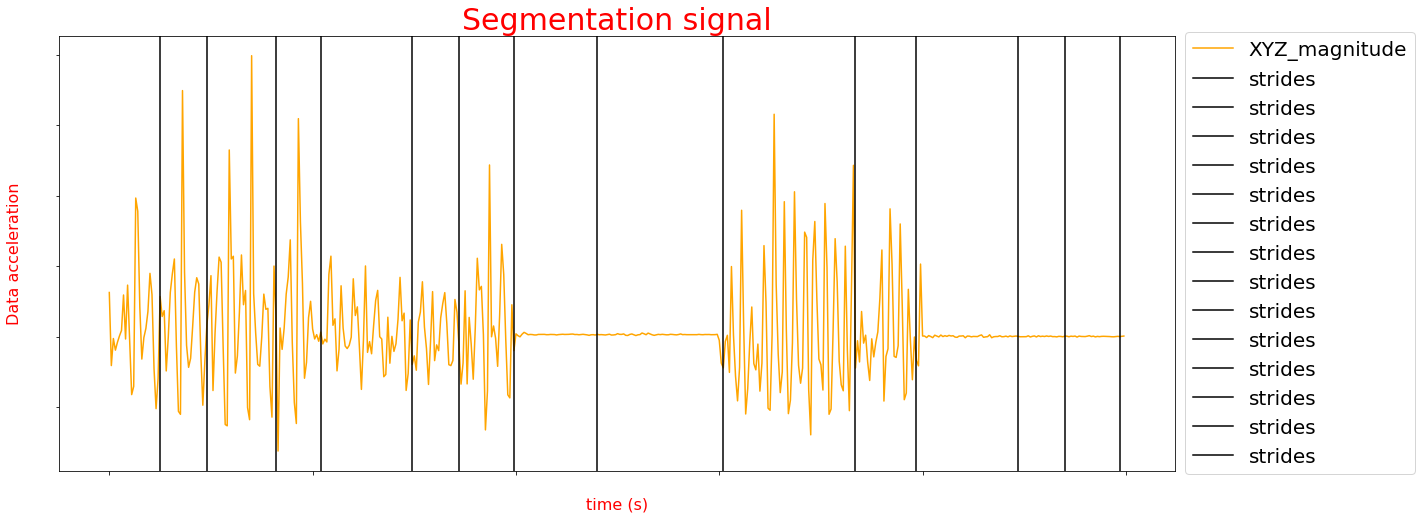

In [28]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ_magnitude',color='orange')
for i in list_of_valley:
    plt.axvline(t[i],color='black',label='strides')
plt.title('Segmentation signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

Calculate The Hight of each wave

In [29]:
hight_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        hight_xyz.append(max(XYZ[0:list_of_valley[0]])-min(XYZ[0:list_of_valley[0]]))
    else:
        hight_xyz.append(max(XYZ[list_of_valley[i-1]:list_of_valley[i]])-min(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
hight_xyz

[1.4954597280115718,
 2.2986144290677553,
 2.6279336060318164,
 2.359839710215434,
 0.9532219004608785,
 0.7292019595451099,
 1.8809845943172991,
 0.12989648709997215,
 0.21353947052255084,
 2.276020747869363,
 1.364621734675701,
 0.7224453178475922,
 0.00869328873840225,
 0.01009329293260719]

In [ ]:
Calculate the Mean of every wave

In [39]:
import statistics
mean_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        mean_xyz.append(statistics.mean(XYZ[0:list_of_valley[0]]))
    else:
        mean_xyz.append(statistics.mean(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
mean_xyz

[1.069238345249147,
 1.1173030068380576,
 1.1445002927170083,
 1.105057057231623,
 1.0384408412750739,
 1.0142799173630421,
 1.0418050242590648,
 1.011840618170954,
 1.0107595185530585,
 1.0490195855903035,
 1.0166068290626973,
 1.0046090204059581,
 1.0011202910845134,
 1.0013546026952174]

In [ ]:
Calculating the width of each wave

In [40]:
width_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        width_xyz.append(t[list_of_valley[i]]-t[0])
    else:
        width_xyz.append(t[list_of_valley[i]]-t[list_of_valley[i-1]])
width_xyz

[25, 23, 34, 22, 45, 23, 27, 41, 62, 65, 30, 50, 23, 27]

Calculating The standered deviassion of each wave

In [41]:
std_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        std_xyz.append(statistics.stdev(XYZ[0:list_of_valley[0]]))
    else:
        std_xyz.append(statistics.stdev(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
std_xyz

[0.35981094043284784,
 0.48181274464592155,
 0.5451006169537893,
 0.4977835506755264,
 0.22479868820404705,
 0.20943272330467078,
 0.40053836058926745,
 0.018389734800188913,
 0.02635354493508167,
 0.5089439069210463,
 0.33934765917940374,
 0.0829588277756286,
 0.002539471533325822,
 0.002164173705059176]